<a href="https://colab.research.google.com/github/Nayab-05/93_Python_Data_Analytics_Projects/blob/main/SuperStore_Sales_Data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
DATA_PATH = "SuperStore Sales DataSet.csv"  # <<--- change this
TARGET_COLUMN = "target"     # <<--- change this to the column name of the label
RANDOM_STATE = 42


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# 1. Load data
df = pd.read_csv(r'/content/SuperStore Sales DataSet.csv')
print("Shape:", df.shape)
display(df.head())

Shape: (5901, 23)


,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01/01/2019,07/01/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02/01/2019,07/01/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02/01/2019,07/01/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03/01/2019,05/01/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03/01/2019,08/01/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [7]:
# 2. Basic info
print("\n--- Info ---")
print(df.info())
print("\n--- Describe ---")
display(df.describe(include='all').T)


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-n

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID+O6G3A1:R6,5901.0,NaN,NaN,NaN,5022.422471,2877.977184,1.0,2486.0,5091.0,7456.0,9994.0
Order ID,5901,3003,CA-2020-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,5901,643,05/09/2019,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,5901,690,26/09/2020,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,5901,4,Standard Class,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,5901,773,EP-13915,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,5901,773,Emily Phan,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,5901,3,Consumer,2997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,5901,1,United States,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,5901,452,New York City,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 3. Remove duplicates and irrelevant columns
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [9]:
# If there are obvious irrelevant columns like 'id' / 'unnecessary', drop them:
for col in ['id', 'ID', 'index']:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"Dropped column: {col}")

In [10]:
# 4. Missing values - inspection
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64


In [11]:
# 4. Missing values - inspection
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64


In [12]:
# Strategy:
# - If numeric columns have few missing values -> impute with median
# - If categorical columns -> impute with most frequent
# Decide column types:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if TARGET_COLUMN in numeric_cols:
    numeric_cols.remove(TARGET_COLUMN)
if TARGET_COLUMN in categorical_cols:
    categorical_cols.remove(TARGET_COLUMN)

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Row ID+O6G3A1:R6', 'Sales', 'Quantity', 'Profit', 'Returns', 'ind1', 'ind2']
Categorical columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Payment Mode']


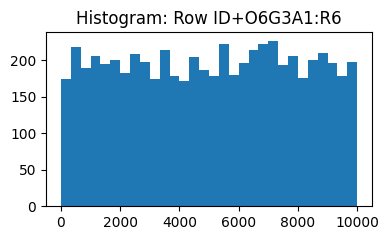

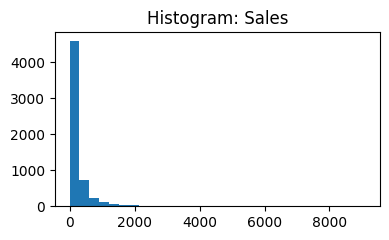

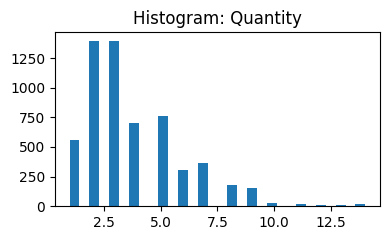

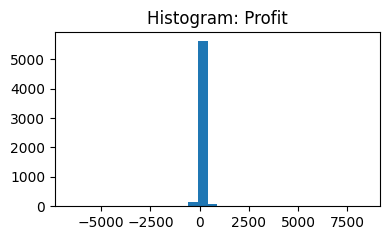

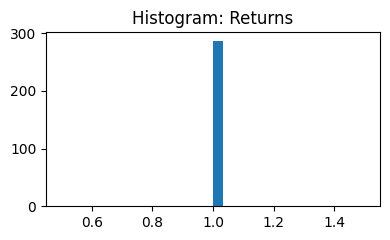

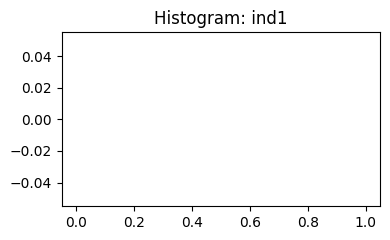

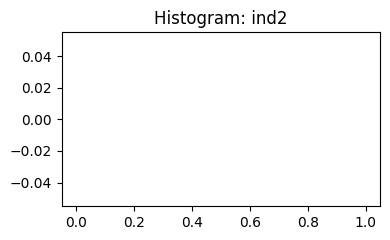

In [13]:
# 5. EDA - Visualizations
# Histogram for numeric features
for col in numeric_cols:
    plt.figure(figsize=(4,2.5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram: {col}')
    plt.tight_layout()
    plt.show()

In [15]:
# # Boxplots to detect outliers
# for col in numeric_cols:
#     plt.figure(figsize=(4,2.5))
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot: {col}')
#     plt.tight_layout()
#     plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['Row ID+O6G3A1:R6', 'Sales', 'Quantity', 'Profit', 'Returns', 'ind1',
       'ind2'],
      dtype='object')

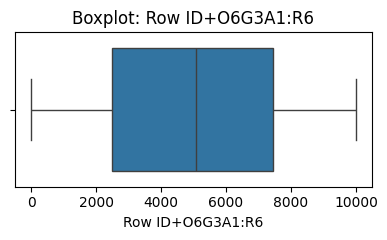

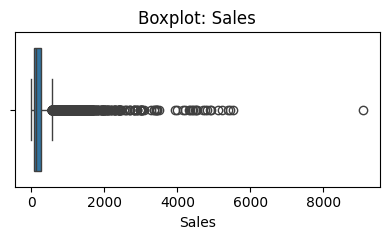

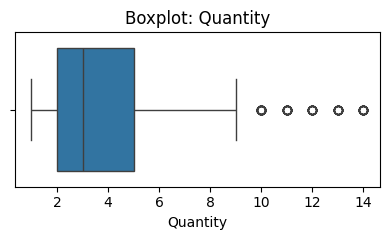

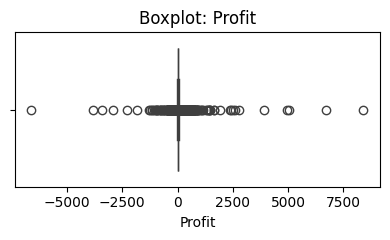

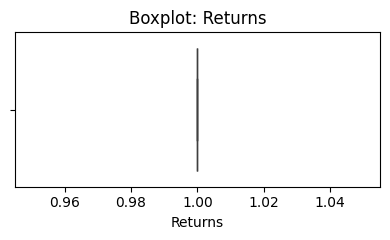

Skipping ind1 — empty column
Skipping ind2 — empty column


In [16]:
for col in numeric_cols:
    if df[col].dropna().shape[0] > 0:     # column empty na ho
        plt.figure(figsize=(4, 2.5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {col} — empty column")


In [17]:
df[numeric_cols].describe()


,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0,0.0,0.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0,NaN,NaN
std,2877.977184,474.260645,2.212917,259.589138,0.0,NaN,NaN
min,1.000000,0.836000,1.000000,-6599.978000,1.0,NaN,NaN
25%,2486.000000,71.976000,2.000000,1.795500,1.0,NaN,NaN
50%,5091.000000,128.648000,3.000000,8.502500,1.0,NaN,NaN
75%,7456.000000,265.170000,5.000000,28.615000,1.0,NaN,NaN
max,9994.000000,9099.930000,14.000000,8399.976000,1.0,NaN,NaN


In [21]:
# Correlation heatmap (numeric)
if numeric_cols:
    plt.figure(figsize=(10,8))
    corr = df[numeric_cols + ([TARGET_COLUMN] if TARGET_COLUMN in df.columns else [])].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation heatmap")
    plt.show()

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

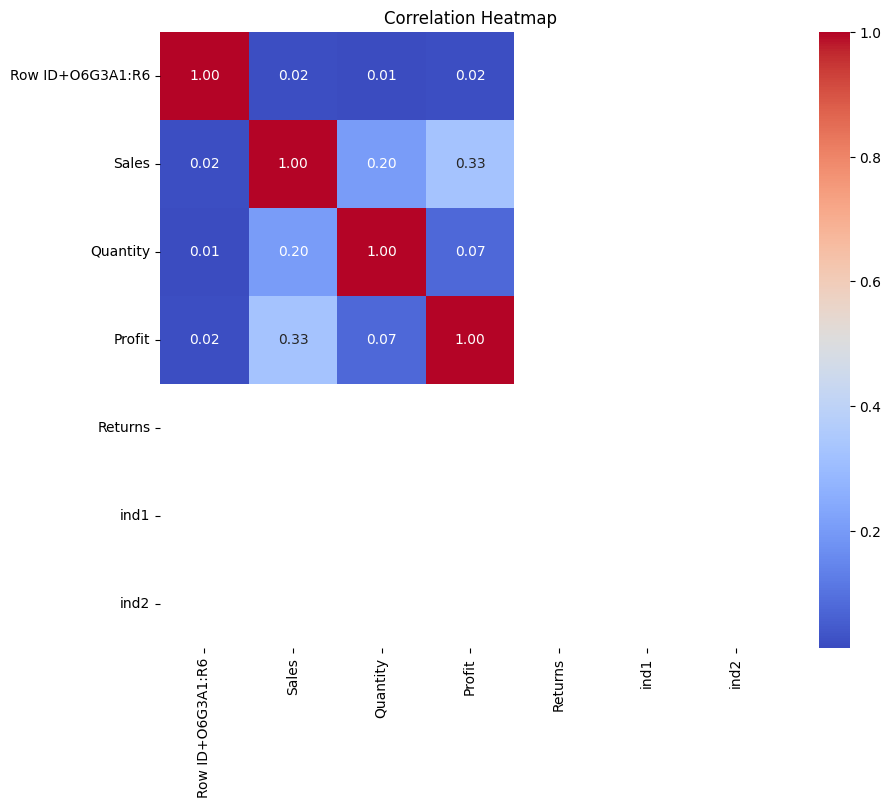

In [24]:
if len(numeric_cols) > 0:
    plt.figure(figsize=(10,8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns found")




In [27]:
# Check class balance
if TARGET_COLUMN in df.columns:
    print("\nTarget distribution:")
    display(df[TARGET_COLUMN].value_counts())
    df[TARGET_COLUMN].value_counts(normalize=True).plot(kind='bar')
    plt.title("Target Class Distribution")
    plt.show()

In [29]:
# 6. Preprocessing pipeline (impute, encode, scale)
# Impute numeric -> median, categorical -> most frequent; Encode categoricals with OneHot (or LabelEncoder if many categories)
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # fixed here
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='drop')


In [34]:
# Features & target
# X = df.drop(columns=[TARGET_COLUMN])
# y = df[TARGET_COLUMN]
print(df.columns.tolist())



['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1', 'ind2']


In [38]:
# Features & target
TARGET_COLUMN = "Returns"
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]




In [39]:
# Encode target if categorical
if y.dtype == 'object' or str(y.dtype).startswith('category'):
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Label encoded target. Classes:", le.classes_)

In [41]:
# Fit & transform features
drop_cols = ['Row ID+O6G3A1:R6', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Order Date', 'Ship Date']
X = df.drop(columns=drop_cols + [TARGET_COLUMN])
y = df[TARGET_COLUMN]


In [42]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [44]:
TARGET_COLUMN = "Returns"
drop_cols = [
    'Row ID+O6G3A1:R6', 'Order ID', 'Customer ID', 'Customer Name',
    'Product ID', 'Product Name', 'Order Date', 'Ship Date'
]

df_model = df.drop(columns=drop_cols)



In [45]:
X = df_model.drop(columns=[TARGET_COLUMN])
y = df_model[TARGET_COLUMN]


In [46]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [48]:
X_processed = preprocessor.fit_transform(X)
print("Processed X shape:", X_processed.shape)


Processed X shape: (5901, 539)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ind1' 'ind2']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [49]:
# Function to get feature names after OneHotEncoder
def get_feature_names(ct):
    feature_names = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            continue
        last_step = trans.steps[-1][1] if isinstance(trans, Pipeline) else trans
        if hasattr(last_step, 'get_feature_names_out'):
            feature_names.extend(last_step.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)
    return feature_names

try:
    feature_names = get_feature_names(preprocessor)
except:
    feature_names = None

In [50]:
# 7. Models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}


In [51]:
# 7A. Single train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)
print("\nTrain/Test shapes:", X_train.shape, X_test.shape)

def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", round(accuracy_score(y_te, y_pred),4))
    print("Precision (weighted):", round(precision_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("Recall (weighted):", round(recall_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("F1 (weighted):", round(f1_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("\nClassification Report:\n", classification_report(y_te, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

for model in models.values():
    evaluate_model(model, X_train, X_test, y_train, y_test)

ValueError: Input y contains NaN.

In [52]:
print(y.isnull().sum())


5614


In [53]:
mask = y.notnull()
X_processed = X_processed[mask]
y = y[mask]


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)
print("\nTrain/Test shapes:", X_train.shape, X_test.shape)



Train/Test shapes: (200, 539) (87, 539)


In [56]:
# Ensure TARGET_COLUMN is set correctly
TARGET_COLUMN = "Returns"

# Drop irrelevant columns
drop_cols = [
    'Row ID+O6G3A1:R6', 'Order ID', 'Customer ID', 'Customer Name',
    'Product ID', 'Product Name', 'Order Date', 'Ship Date'
]

# Drop irrelevant columns
df_model = df.drop(columns=drop_cols)

# Features & target
X = df_model.drop(columns=[TARGET_COLUMN])
y = df_model[TARGET_COLUMN]

# Drop rows where target is NaN
mask = y.notnull()
X = X[mask]
y = y[mask]

# Numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Fit and transform features
X_processed = preprocessor.fit_transform(X)
print("Processed X shape:", X_processed.shape)

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# 7A. Single train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)
print("\nTrain/Test shapes:", X_train.shape, X_test.shape)

# Evaluation function
def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", round(accuracy_score(y_te, y_pred),4))
    print("Precision (weighted):", round(precision_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("Recall (weighted):", round(recall_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("F1 (weighted):", round(f1_score(y_te, y_pred, average='weighted', zero_division=0),4))
    print("\nClassification Report:\n", classification_report(y_te, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

# Evaluate all models
for model in models.values():
    evaluate_model(model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['ind1' 'ind2']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Processed X shape: (287, 113)

Train/Test shapes: (200, 113) (87, 113)

Model: DecisionTreeClassifier
Accuracy: 1.0
Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

Confusion Matrix:
 [[87]]

Model: GaussianNB
Accuracy: 1.0
Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

Confusion Matrix:
 [[87]]

Model: KNeighborsClassifier
Accuracy: 1.0
Precision (weighted): 1.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [57]:
# 7B. StratifiedKFold CV
print("\n--- StratifiedKFold Cross-validation (5 folds) ---")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
for name, model in models.items():
    scores = cross_val_score(model, X_processed, y, scoring='accuracy', cv=skf)
    print(f"{name} CV accuracy: mean={scores.mean():.4f}, std={scores.std():.4f}")


--- StratifiedKFold Cross-validation (5 folds) ---
DecisionTree CV accuracy: mean=1.0000, std=0.0000
NaiveBayes CV accuracy: mean=1.0000, std=0.0000
KNN CV accuracy: mean=1.0000, std=0.0000


In [58]:
# 7C. Different test splits
for test_size in [0.2,0.3,0.4]:
    Xtr, Xte, ytr, yte = train_test_split(X_processed, y, test_size=test_size, random_state=RANDOM_STATE, stratify=y)
    print(f"\nTest size: {test_size}")
    for name, model in models.items():
        model.fit(Xtr, ytr)
        ypred = model.predict(Xte)
        print(f"{name} acc: {accuracy_score(yte, ypred):.4f}", end=" | ")
    print()


Test size: 0.2
DecisionTree acc: 1.0000 | NaiveBayes acc: 1.0000 | KNN acc: 1.0000 | 

Test size: 0.3
DecisionTree acc: 1.0000 | NaiveBayes acc: 1.0000 | KNN acc: 1.0000 | 

Test size: 0.4
DecisionTree acc: 1.0000 | NaiveBayes acc: 1.0000 | KNN acc: 1.0000 | 


In [59]:
# 8. Save summary results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, ypred),
        "precision": precision_score(y_test, ypred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, ypred, average='weighted', zero_division=0),
        "f1": f1_score(y_test, ypred, average='weighted', zero_division=0)
    })

results_df = pd.DataFrame(results).sort_values(by='f1', ascending=False)
print("\nSummary results:")
display(results_df)


Summary results:


,model,accuracy,precision,recall,f1
0,DecisionTree,1.0,1.0,1.0,1.0
1,NaiveBayes,1.0,1.0,1.0,1.0
2,KNN,1.0,1.0,1.0,1.0


In [60]:
# 9. Save processed dataset (optional)
processed_df = pd.DataFrame(X_processed, columns=(feature_names if feature_names else range(X_processed.shape[1])))
processed_df[TARGET_COLUMN] = y
processed_df.to_csv("processed_data.csv", index=False)
print("Saved processed_data.csv")

print("\n-- Completed. For viva: be ready to explain preprocessing, scaling, encoding, splits, CV, and metrics.")

Saved processed_data.csv

-- Completed. For viva: be ready to explain preprocessing, scaling, encoding, splits, CV, and metrics.
